In [9]:
import numpy as np
import scipy.fftpack as fftpack
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from tempfile import TemporaryFile

import cv2

In [14]:
age1= sio.loadmat('./age_group/age_big.mat')
path1=sio.loadmat('./age_group/path_big.mat')
data_age= age1['data_age']
data_path= path1['data_path']

In [15]:
images=[]
age=[]
path=[]
r=0
# print(data_path[0,0])
[h,w]= data_path.shape
print(w)
for i in range(1000):
    str_1= ''.join(data_path[0,i])
    str_1='./imdb_crop/'+str_1
    str_1.replace(" \ "," / ")
    
    temp_age= data_age[0,i]
    try:
        data=plt.imread(str_1)
        # plt.imshow(data)
        # age.append(temp_age)
        # path.append(str_1)
        
    except:
        print(str_1)
        print(i)
        continue
    img1= cv2.resize(data,(256,256))
    try:
        img= img1.reshape(256*256*3)
    except:
        continue
    images.append(img1)
    age.append(temp_age)
print("finished")
print(len(images))

459463


finished
608


(256, 256, 3)
(256, 256, 3)
['02/nm0000002_rm4291934720_1924-9-16_2004.jpg']


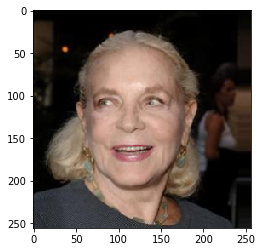

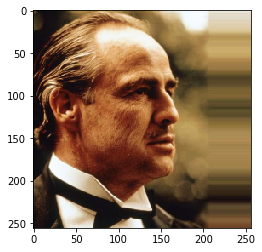

In [4]:
# plt.imshow(images[62300])
print(images[62].shape)
print(images[58].shape)
plt.imshow(images[38].reshape(256,256,3))
print(data_path[0,38])
plt.figure()
plt.imshow(images[100].reshape(256,256,3))

In [5]:
vec_image= np.asanyarray(images)
vec_image= vec_image
print(vec_image.shape)
train_image=vec_image[0:600,:]
test_image=vec_image[600:,:]

(608, 196608)


In [7]:
pca400= PCA(n_components=400)
out= pca400.fit_transform(train_image)
# test_out= pca400.transform(test_image)
print(out.shape)
# print(test_out.shape)

In [10]:
test_out= pca400.transform(test_image)
print(test_out.shape)

(376, 400)


In [14]:
print(len(age))
age_train=age[:1200]
age_test= age[1200:]

1576


In [15]:
neigh = KNeighborsClassifier(n_neighbors=3)
x= out
y= np.asanyarray(age_train)
neigh.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

(array([ 1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         1.,  0.,  1.,  2.,  2.,  0.,  2.,  0.,  1.,  2.,  2.,  4.,  4.,
         1.,  2.,  2.,  1.,  4.,  3.,  2.,  2.,  2.,  4.,  3.,  8.,  3.,
         1.,  3.,  3.,  5.,  2.,  2.,  2.,  1.,  3.,  5.,  1., 12.,  5.,
         4.,  3.,  6.,  4.,  9., 10.,  8.,  8., 10., 13., 27.,  9., 19.,
        13., 13.,  6., 12., 16.,  5., 13.,  7.,  5.,  9.,  9.,  1.,  5.,
         4.,  2.,  1.,  1.,  2.,  2.,  1.,  0.,  4.,  1.,  1.,  0.,  0.,
         0.,  0.,  2.,  0.,  1.,  0.,  0.,  1.,  2.]),
 array([-72.  , -70.92, -69.84, -68.76, -67.68, -66.6 , -65.52, -64.44,
        -63.36, -62.28, -61.2 , -60.12, -59.04, -57.96, -56.88, -55.8 ,
        -54.72, -53.64, -52.56, -51.48, -50.4 , -49.32, -48.24, -47.16,
        -46.08, -45.  , -43.92, -42.84, -41.76, -40.68, -39.6 , -38.52,
        -37.44, -36.36, -35.28, -34.2 , -33.12, -32.04, -30.96, -29.88,
        -28.8 , -27.72, -26.64, -25.56, -24.48, -23.4 , -22.32, -21.24,
  

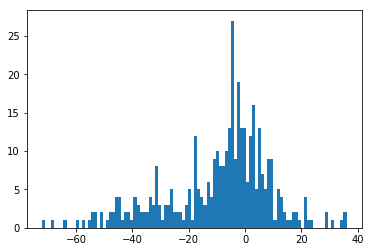

In [16]:
z=neigh.predict(test_out)
y_test= np.asanyarray(age_test)
count=0
diff= z-y_test
plt.hist(diff,bins=100)

In [75]:
input_img= np.array(images)
print(input_img.shape)
in_r=input_img[:,:,:,0].reshape(-1,256,256)
in_g=input_img[:,:,:,1].reshape(-1,256,256)
in_b=input_img[:,:,:,2].reshape(-1,256,256)
# input_imgs=[in_r,in_g,in_b]
input_img= np.concatenate((in_r,in_g,in_b),axis=0)
# input_img=input_img.reshape(-1,256,256)
fft_image= fftpack.dct(input_img)
print(input_img.shape)
print(fft_image.shape)

(608, 256, 256, 3)


(1824, 256, 256)
(1824, 256, 256)


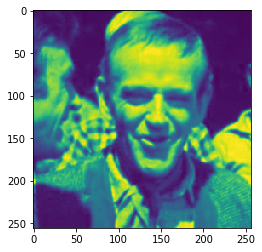

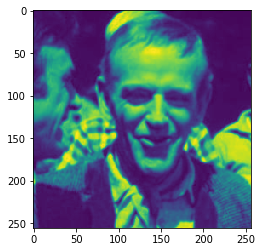

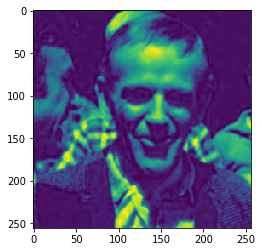

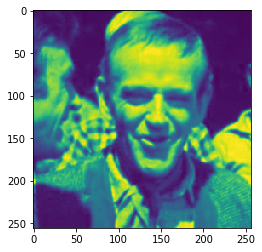

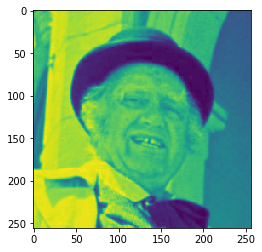

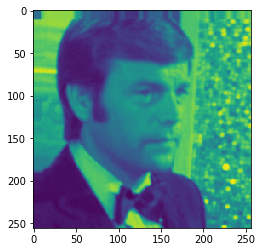

In [76]:
img1= images[0]
plt.figure()
plt.imshow(img1[:,:,0])
plt.figure()
plt.imshow(img1[:,:,1])
plt.figure()
plt.imshow(img1[:,:,2])
plt.figure()
plt.imshow(input_img[0,:,:])
plt.figure()
plt.imshow(input_img[1,:,:])
plt.figure()
plt.imshow(input_img[2,:,:])
# plt.imshow(fft_image[0])
#outfile = TemporaryFile()
# print(fft_image[0,:,:])
#np.savez(outfile, fft_image[0,:,:,:])
# img0= fft_image[0,:,0:6].reshape(256,6)
#plt.matshow(img0)
# plt.colorbar()
# plt.show()

In [70]:

train_image=fft_image[0:400,:,0:6]
test_image=fft_image[1616:,:,0:6]
train_image= train_image.reshape(-1,256*6)
test_image=test_image.reshape(-1,256*6)
print(train_image.shape)

(400, 1536)


In [62]:
pca400= PCA(n_components=40)
out= pca400.fit_transform(train_image)
# test_out= pca400.transform(test_image)
print(out.shape)

(400, 40)


In [63]:
test_out= pca400.transform(test_image)
print(test_out.shape)

(1424, 40)


In [71]:
len2= out.shape[0]
lables= age
lables.extend(age)
lables.extend(age)

age_train=age[:len2]
age_test= age[len2:]
print(len(age_train))

400


In [68]:
neigh = KNeighborsClassifier(n_neighbors=100)
x= train_image
y= age_train
neigh.fit(x,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

0.3894230769230769
0.5625
0.7211538461538461


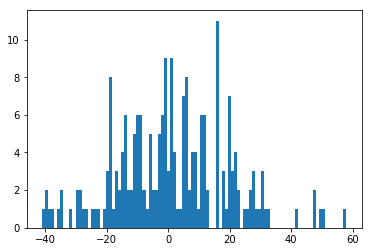

In [72]:
z=neigh.predict(test_image)
y_test= np.asanyarray(age_test)
count=0
diff=[]
for i in range(len(z)):
    temp= int(z[i])- int(y_test[i])
    diff.append(temp)
plt.hist(diff,bins=100)
collect_1= [i for i in diff if abs(i)<10]
collect_2= [i for i in diff if abs(i)<15]
collect_3= [i for i in diff if abs(i)<20]
print(len(collect_1)/len(test_image))
print(len(collect_2)/len(test_image))
print(len(collect_3)/len(test_image))